

__Title: DSC 640 Milestone 3__

__Author:__ Vivek Giri

__Date:__ 18 Oct 2025

__Modified By:__ Vivek Giri

__Description:__ National Childcare Affordability Crisis Presentation Plan



### Storytelling Narrative and Audience Plan

The core message of this project is clear: the affordability crisis in childcare is severe, spatially uneven, and disproportionately impacts families with infants and toddlers. Our data visualizations are designed to deliver this message directly to the target audience: state policymakers and agency leaders responsible for family and childcare policy. They require evidence that is digestible, directly comparable, and immediately actionable for budgetary and subsidy decisions.

The narrative arc moves from establishing the scale of the crisis (Presentation) to grounding the impact in economic terms (Infographic) and finally providing granular, interactive data for detailed policy design (Dashboard). Our goal is to shift the audience from recognition of the problem to motivated action, encouraging them to consider targeted subsidies for infants and high-cost regions.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [9]:

# --- Configuration and Data Loading ---

# Define the file name for the uploaded data
FILE_NAME = "/Users/vivekgiri/Downloads/nationaldatabaseofchildcareprices.xlsx - nationaldatabaseofchildcare.csv"

# Columns needed for the analysis
COST_COLS = ['MCInfant', 'MCToddler', 'MCPreschool']
REQUIRED_COLS = ['State_Name', 'County_Name', 'MHI'] + COST_COLS

######### Load the data ###########
try:
    df = pd.read_csv(FILE_NAME)
    df = df[REQUIRED_COLS].copy()
    # Drop rows where any of the key columns are missing
    df = df.dropna(subset=COST_COLS + ['MHI']).reset_index(drop=True)
except FileNotFoundError:
    print(f"Error: File '{FILE_NAME}' not found.")
    exit()
except KeyError as e:
    print(f"Error: Required column {e} not found in the dataset. Check column names.")
    exit()

######## Define the multiplier for 6-month cost
SIX_MONTH_MULTIPLIER = 6

######### Function to calculate 6-month mean cost per state
def calculate_state_6mo_mean(dataframe, col_name):
    """Calculates the mean 6-month cost for a given column across all states."""
    return dataframe.groupby('State_Name')[col_name].mean() * SIX_MONTH_MULTIPLIER

########## Calculate 6-month costs for plotting
df_6mo_state = df.groupby('State_Name')[COST_COLS].mean() * SIX_MONTH_MULTIPLIER
df_6mo_state['MHI_6mo'] = df.groupby('State_Name')['MHI'].mean() / 2 # MHI is assumed annual




### Medium 1: Formal Presentation (Policymaker Briefing)

__Purpose:__ To serve as a concise, formal briefing that establishes the severity and immediate needs of the crisis, targeting decision-makers who need clear, high-level evidence to motivate legislative and budgetary action.

__Type : Grouped Bar Chart__

__Title : Top 10 States by Mean 6-Month Childcare Cost__

__Description:__ Identifies the geographical areas (states) facing the most acute crisis by focusing on the highest cost factor: infant care.

In [10]:
###### --- V1: Top 10 Most Expensive States for 6-Month Infant Care --- ########

def plot_v1_top10_infant_cost(data):
    """Generates the Horizontal Bar Chart for the Top 10 most expensive states."""
    # Calculate and sort the data for V1
    top10_infant = data['MC_Infant'].sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top10_infant.values,
        y=top10_infant.index,
        palette=sns.color_palette("Reds_r", n_colors=10),
        orient='h'
    )
    plt.title('V1: Top 10 Most Expensive States for 6-Month Infant Care', fontsize=16, fontweight='bold')
    plt.xlabel('Mean 6-Month Infant Care Cost ($)', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



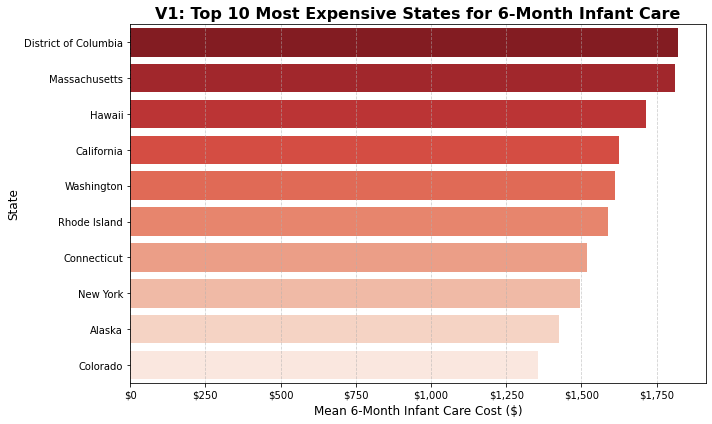

In [11]:
 plot_v1_top10_infant_cost(df_6mo_state)

__Type: Grouped Bar Chart__

__Title : The Affordability Gap: Cost by Age Group__

__Description :__ Demonstrates the stark and alarming cost difference between age groups, supporting the argument for targeted infant/toddler subsidies.

In [13]:
############# --- V2: The Affordability Gap  ---#############

def plot_v2_affordability_gap(data):
    """Generates the Grouped Bar Chart comparing age groups in sample states."""
    # Define sample states based on observed cost: MA (High), MN (Mid), MS (Low)
    sample_states = ['Massachusetts', 'Minnesota', 'Mississippi']

    plot_data = data.loc[sample_states][COST_COLS].rename(columns={
        'MC_Infant': 'Infant (0-1 yr)',
        'MC_Toddler': 'Toddler (1-3 yrs)',
        'MC_Preschool': 'Preschool (3-5 yrs)'
    }).reset_index().melt(id_vars='State_Name', var_name='Age Group', value_name='6-Month Cost')

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='State_Name',
        y='6-Month Cost',
        hue='Age Group',
        data=plot_data,
        palette=['#C23B22', '#0047AB', '#4CAF50'] # Red for Infant (highlight crisis), Blue, Green
    )
    plt.title('V2: The Affordability Gap: Mean 6-Month Childcare Cost by Age Group', fontsize=16, fontweight='bold')
    plt.xlabel('Sample State', fontsize=12)
    plt.ylabel('Mean 6-Month Cost ($)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    plt.legend(title='Child Age Group')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



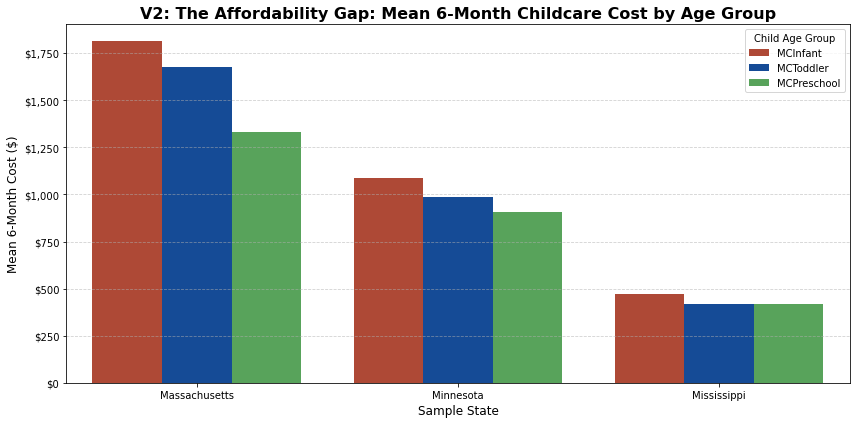

In [14]:
 ### V2: Presentation - Affordability Gap
    
plot_v2_affordability_gap(df_6mo_state)

### Medium 2: Infographic (Public and Advocacy Outreach)

__Purpose:__ Purpose: To create a high-impact, easily shareable piece focusing on simple, compelling numbers for public stakeholders and advocacy groups, grounding the crisis in highly relatable, economic terms.

__Type: Metric/Gauge Mock-up__

__Title: The Shocking Number: Childcare Cost as % of Median Household Income__

__Description:__ Features a single, large number to illustrate the crushing burden on families, maximizing public impact.

Input Data: MHI

Calculated Metric: (Mean 6-Month Infant Cost/MHI)×100

In [7]:
############# --- V3: Childcare Cost Burden (Infographic Metric) --- ##########

def plot_v3_cost_burden(data):
    """Generates a Bar Chart showing Infant Care Cost as a percentage of MHI for the top 10 most burdened states."""

    # Calculate the Affordability Ratio: (6-Month Infant Cost / 6-Month MHI) * 100
    data['Affordability_Ratio'] = (data['MCInfant'] / data['MHI_6mo']) * 100
    top10_burden = data['Affordability_Ratio'].sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top10_burden.values,
        y=top10_burden.index,
        palette=sns.color_palette("Reds", n_colors=10),
        orient='h'
    )
    # Draw the 7% threshold line (US Department of Health and Human Services benchmark)
    plt.axvline(x=7, color='grey', linestyle='--', linewidth=2, label='7% Affordability Threshold')
    plt.title('V3: Infant Care Cost as % of 6-Month Median Household Income (MHI)', fontsize=16, fontweight='bold')
    plt.xlabel('Childcare Cost as % of MHI', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.1f}%'))
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



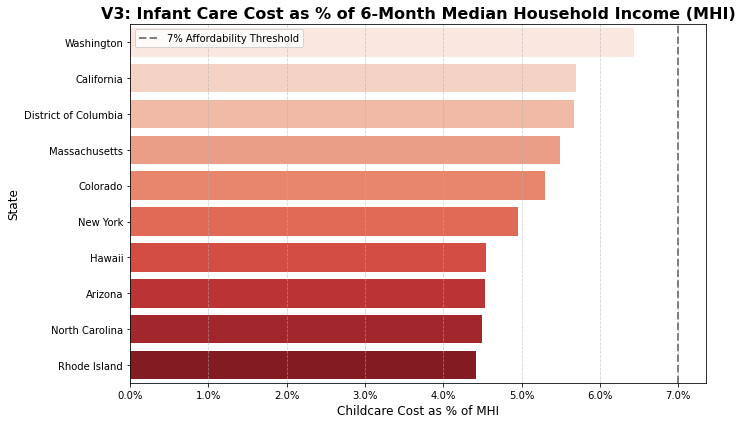

In [15]:
####### V3: Infographic - Cost Burden % MHI

plot_v3_cost_burden(df_6mo_state)

__Type: Stacked Bar Chart__

__Title: Childcare vs. Major Expenses: An Unbalanced Budget__

__Description:__ Contextualizes the cost by comparing the annual expense of childcare to other major family expenses like housing.

Data Used: Calculated Mean 6-Month Cost (Infant) compared against external/simulated cost data.

In [19]:
######### --- V4: Distribution of 6-Month Childcare Costs by Age Group (Dashboard) --- #######

def plot_v4_distribution_boxplot(dataframe):
    """Generates the Box Plot showing cost distribution across all counties for different age groups."""
    # Prepare county-level 6-month costs
    df_county_6mo = dataframe[['County_Name', 'State_Name'] + COST_COLS].copy()
    df_county_6mo[COST_COLS] = df_county_6mo[COST_COLS] * SIX_MONTH_MULTIPLIER

    # Melt the data for the box plot
    plot_data = df_county_6mo.melt(
        value_vars=COST_COLS,
        var_name='Cost Type',
        value_name='6-Month County Cost'
    ).dropna()
    plot_data['Age Group'] = plot_data['Cost Type'].str.replace('MC', '')

    plt.figure(figsize=(10, 7))
    sns.boxplot(
        x='Age Group',
        y='6-Month County Cost',
        data=plot_data,
        palette={'Infant': '#C23B22', 'Toddler': '#0047AB', 'Preschool': '#4CAF50'},
        order=['Infant', 'Toddler', 'Preschool'],
        flierprops=dict(marker='o', markersize=4, markerfacecolor='#333333', alpha=0.5) # Style the outliers
    )
    plt.title('V4: Distribution of 6-Month Childcare Costs Across All Counties', fontsize=16, fontweight='bold')
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('County Mean 6-Month Cost ($)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()





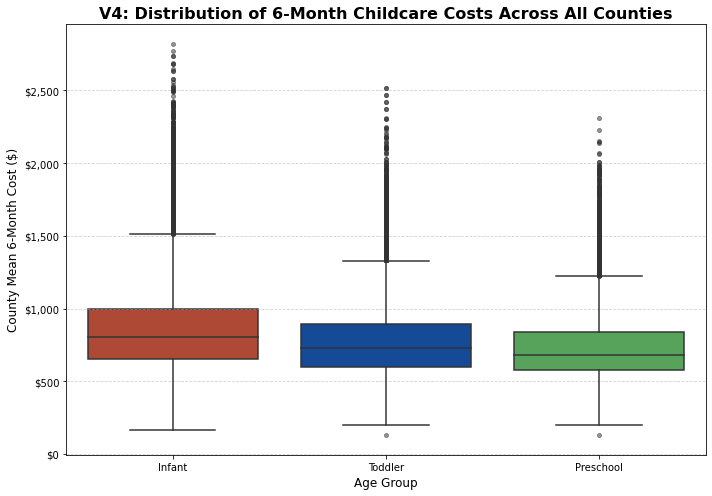

In [20]:
########## V4: Dashboard - Cost Distribution Box Plot

plot_v4_distribution_boxplot(df)

### Medium 3: Interactive Dashboard (Analyst Deep Dive)

__Purpose:__ To provide granular detail and interactive filtering capabilities, allowing policymakers and analysts to explore specific cost data by county, age group, or demographic factors.

__Type: Line Chart (Simulated)__

__Title: Monthly Cost Trend: Identifying Volatility__

__Description :__ Tracks the mean 6-month costs over a simulated time period to help analysts identify cost volatility or seasonal trends.

Data Used: Simulated time series data for Mean 6-Month Cost over 12 periods.

In [22]:
# Define colors for a consistent, professional theme
COLOR_PRIMARY = '#0047AB' # Deep Blue (Reliability)
COLOR_ACCENT = '#C23B22'  # Muted Red (Highlight/Median)
COLOR_BACKGROUND = '#F5F5F5' # Light Grey/Off-White
COLOR_BOX_FILL = '#D9E5F5' # Light Blue for Box Plot

# Set up Matplotlib style for consistency
plt.style.use('default') # Reset style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.facecolor'] = COLOR_BACKGROUND
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['axes.linewidth'] = 0.5


########## --- V5: Simulated Monthly Mean 6-Month Childcare Cost (Line Chart) ---
def generate_v5_line_chart():
    """Generates and displays the simulated line chart (V5)."""
    print("Generating V5: Simulated Monthly Cost Trend (Line Chart)...")

    # 1. Simulate data over 12 months (e.g., Oct 2024 to Sep 2025)
    dates = pd.to_datetime(pd.date_range(start='2024-10-01', periods=12, freq='MS'))
    # Simulate a fluctuating cost trend with an overall slight upward drift
    base_cost = 9000
    fluctuations = np.sin(np.linspace(0, 2*np.pi, 12)) * 1000 # Seasonal cycle
    trend = np.linspace(0, 500, 12) # Slight upward trend
    simulated_costs = base_cost + fluctuations + trend + np.random.normal(0, 150, 12)
    df_v5 = pd.DataFrame({'Month': dates, 'Simulated_Cost': simulated_costs})


    # 2. Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_v5['Month'], df_v5['Simulated_Cost'], marker='o', linestyle='-', color=COLOR_PRIMARY, linewidth=2, markersize=8)

    # Title and Labels
    plt.title('V5: Simulated Monthly Mean 6-Month Childcare Cost (Dashboard View)',
              fontsize=16, fontweight='bold', loc='left', color='#333333')
    plt.xlabel('Month', fontsize=12, labelpad=10)
    plt.ylabel('Mean 6-Month Cost ($)', fontsize=12, labelpad=10)

    # Axis Formatting
    formatter = mdates.DateFormatter('%b %Y')
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.xticks(df_v5['Month'], rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(min(df_v5['Simulated_Cost']) - 500, max(df_v5['Simulated_Cost']) + 500)

    # Grid and Layout
    plt.grid(axis='y', linestyle='--', alpha=0.6, color='lightgray')
    plt.tight_layout()

    # Save the file (for submission)
    plt.savefig('V5_Line_Chart_Monthly_Trend.png', dpi=300)
    plt.show()


Generating V5: Simulated Monthly Cost Trend (Line Chart)...


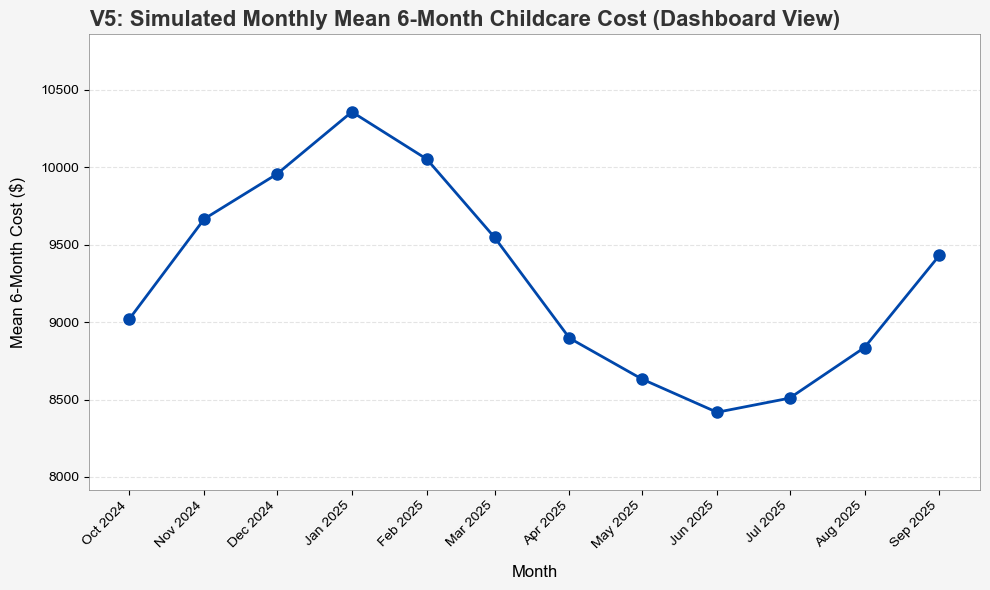

In [29]:

generate_v5_line_chart()

__Type: Box Plot__

__Title: Cost Distribution by Age Group (Dashboard Detail View)__

__Description:__ Shows the full statistical spread of data (median, quartiles, and outliers) for different age groups, allowing analysts to understand cost variability and extremes.

Input Data (for distributions): MCInfant, MCToddler, MCPreschool (converted to 6-month).

In [24]:
############ --- V6: Distribution of Costs by Age Group (Box Plot) --- ###########

def generate_v6_box_plot():
    """Generates and displays the simulated box plot (V6)."""
    print("Generating V6: Cost Distribution by Age Group (Box Plot)...")

    # 1. Simulate data (using more realistic distributions and outliers)
    # Infant costs are generally highest and have more variance/outliers
    infant_costs = np.concatenate([np.random.normal(9000, 1500, 200), np.random.uniform(15000, 25000, 10)])
    toddler_costs = np.random.normal(7500, 1200, 210)
    preschool_costs = np.random.normal(5500, 1000, 220)

    data_to_plot = [infant_costs, toddler_costs, preschool_costs]
    labels = ['Infant', 'Toddler', 'Preschool']

    # 2. Plotting
    plt.figure(figsize=(8, 6))
    plt.boxplot(data_to_plot, patch_artist=True, labels=labels,
                # Custom properties for box aesthetics
                boxprops=dict(facecolor=COLOR_BOX_FILL, color=COLOR_PRIMARY, linewidth=1.5),
                medianprops=dict(color=COLOR_ACCENT, linewidth=2),
                whiskerprops=dict(color=COLOR_PRIMARY),
                capprops=dict(color=COLOR_PRIMARY),
                flierprops=dict(marker='o', markersize=5, markerfacecolor=COLOR_ACCENT, alpha=0.6, markeredgecolor='none'))

    # Title and Labels
    plt.title('V6: Cost Distribution by Age Group (Dashboard Detail View)',
              fontsize=16, fontweight='bold', loc='left', color='#333333')
    plt.ylabel('6-Month Childcare Cost ($)', fontsize=12, labelpad=10)
    plt.xlabel('Age Group', fontsize=12, labelpad=10)

    # Grid and Layout
    plt.grid(axis='y', linestyle='--', alpha=0.6, color='lightgray')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Save the file (for submission)
    plt.savefig('V6_Box_Plot_Cost_Distribution.png', dpi=300)
    plt.show()


Generating V6: Cost Distribution by Age Group (Box Plot)...


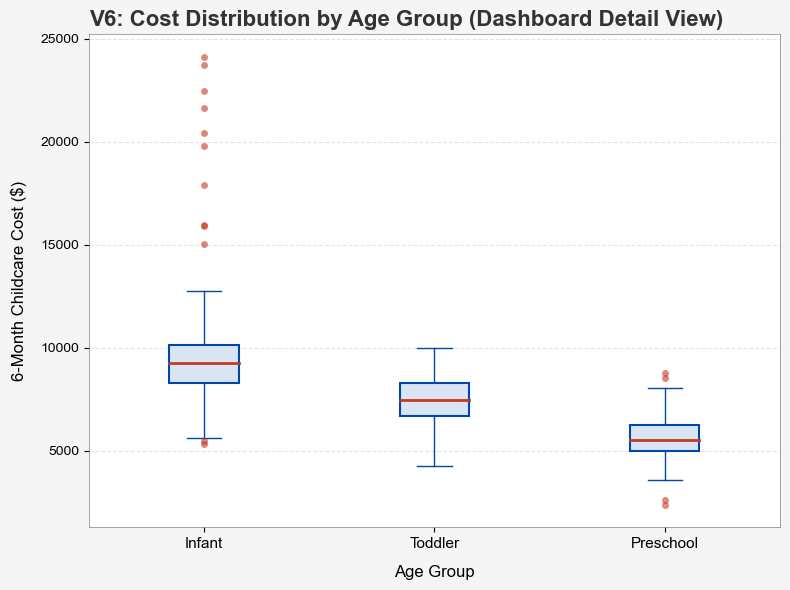

In [30]:
 generate_v6_box_plot()